<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.046820,255.098859,361.145680,-31.617981,392.763661
1,0.0,1.0,25.802863,-2.969659,32.833203,28.925560,3.907643
2,0.0,2.0,49.518155,-37.634028,21.884128,8.485257,13.398871
3,0.0,3.0,48.688446,430.119888,488.808334,9.200387,479.607947
4,0.0,4.0,24.515784,69.244713,103.760497,30.034898,73.725599
...,...,...,...,...,...,...,...
29995,999.0,25.0,79.721953,-718.502468,-628.780515,84.191224,-712.971739
29996,999.0,26.0,79.071046,429.342362,518.413408,82.729842,435.683567
29997,999.0,27.0,26.411616,178.600780,215.012396,-35.498321,250.510717
29998,999.0,28.0,87.423717,1322.675195,1420.098912,101.482816,1318.616096


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.046820,255.098859,361.145680,-31.617981,392.763661
1,0.0,1.0,25.802863,-2.969659,32.833203,28.925560,3.907643
2,0.0,2.0,49.518155,-37.634028,21.884128,8.485257,13.398871
3,0.0,3.0,48.688446,430.119888,488.808334,9.200387,479.607947
4,0.0,4.0,24.515784,69.244713,103.760497,30.034898,73.725599
...,...,...,...,...,...,...,...
29995,999.0,25.0,79.721953,-718.502468,-628.780515,84.191224,-712.971739
29996,999.0,26.0,79.071046,429.342362,518.413408,82.729842,435.683567
29997,999.0,27.0,26.411616,178.600780,215.012396,-35.498321,250.510717
29998,999.0,28.0,87.423717,1322.675195,1420.098912,101.482816,1318.616096


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    96.046820   255.098859   361.145680  -31.617981   392.763661
      1.0    25.802863    -2.969659    32.833203   28.925560     3.907643
      2.0    49.518155   -37.634028    21.884128    8.485257    13.398871
      3.0    48.688446   430.119888   488.808334    9.200387   479.607947
      4.0    24.515784    69.244713   103.760497   30.034898    73.725599
...                ...          ...          ...         ...          ...
999.0 25.0   79.721953  -718.502468  -628.780515   84.191224  -712.971739
      26.0   79.071046   429.342362   518.413408   82.729842   435.683567
      27.0   26.411616   178.600780   215.012396  -35.498321   250.510717
      28.0   87.423717  1322.675195  1420.098912  101.482816  1318.616096
      29.0   72.152731   190.691330   272.844061   67.197207   205.646854

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    96.046820   255.098859   361.145680  -31.617981   392.763661
      1.0    25.802863    -2.969659    32.833203   28.925560     3.907643
      2.0    49.518155   -37.634028    21.884128    8.485257    13.398871
      3.0    48.688446   430.119888   488.808334    9.200387   479.607947
      4.0    24.515784    69.244713   103.760497   30.034898    73.725599
...                ...          ...          ...         ...          ...
999.0 25.0   79.721953  -718.502468  -628.780515   84.191224  -712.971739
      26.0   79.071046   429.342362   518.413408   82.729842   435.683567
      27.0   26.411616   178.600780   215.012396  -35.498321   250.510717
      28.0   87.423717  1322.675195  1420.098912  101.482816  1318.616096
      29.0   72.152731   190.691330   272.844061   67.197207   205.646854

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.046820,255.098859,361.145680,-31.617981,392.763661
1,0.0,1.0,25.802863,-2.969659,32.833203,28.925560,3.907643
2,0.0,2.0,49.518155,-37.634028,21.884128,8.485257,13.398871
3,0.0,3.0,48.688446,430.119888,488.808334,9.200387,479.607947
4,0.0,4.0,24.515784,69.244713,103.760497,30.034898,73.725599
...,...,...,...,...,...,...,...
29995,999.0,25.0,79.721953,-718.502468,-628.780515,84.191224,-712.971739
29996,999.0,26.0,79.071046,429.342362,518.413408,82.729842,435.683567
29997,999.0,27.0,26.411616,178.600780,215.012396,-35.498321,250.510717
29998,999.0,28.0,87.423717,1322.675195,1420.098912,101.482816,1318.616096


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    96.046820   255.098859   361.145680  -31.617981   392.763661
      1.0    25.802863    -2.969659    32.833203   28.925560     3.907643
      2.0    49.518155   -37.634028    21.884128    8.485257    13.398871
      3.0    48.688446   430.119888   488.808334    9.200387   479.607947
      4.0    24.515784    69.244713   103.760497   30.034898    73.725599
...                ...          ...          ...         ...          ...
999.0 25.0   79.721953  -718.502468  -628.780515   84.191224  -712.971739
      26.0   79.071046   429.342362   518.413408   82.729842   435.683567
      27.0   26.411616   178.600780   215.012396  -35.498321   250.510717
      28.0   87.423717  1322.675195  1420.098912  101.482816  1318.616096
      29.0   72.152731   190.691330   272.844061   67.197207   205.646854

[30000 rows x 5 columns]

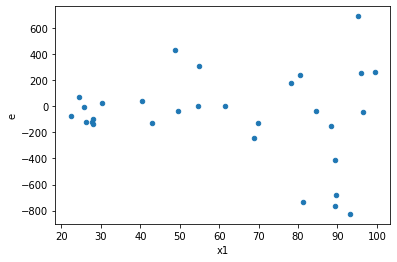

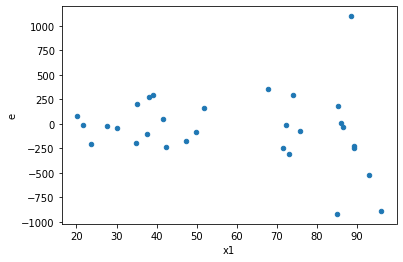

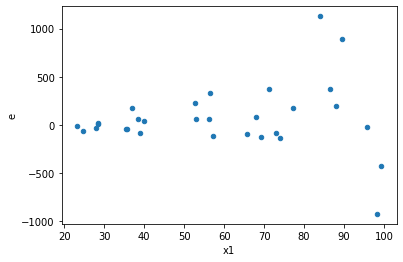

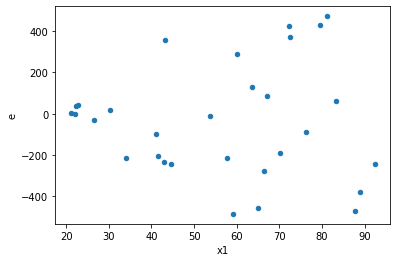

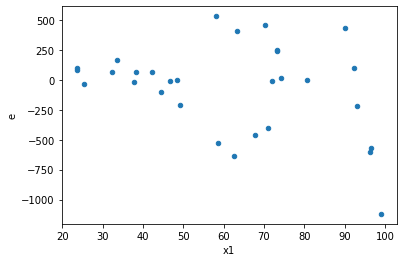

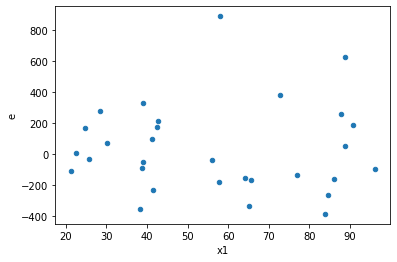

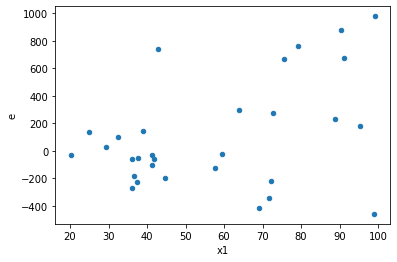

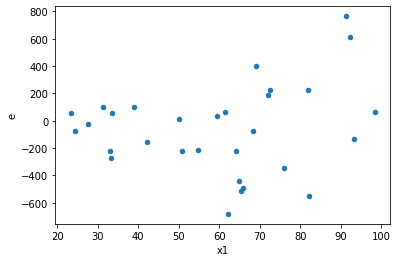

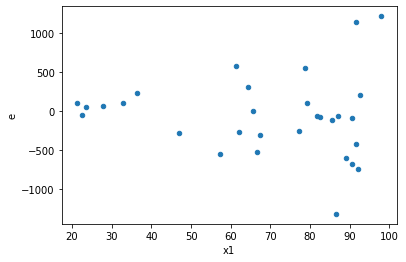

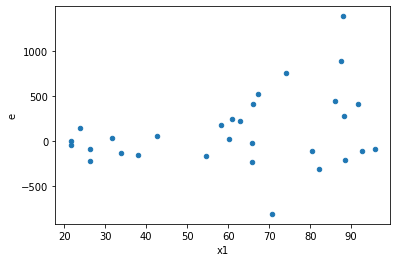

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,11.0,11.0,57184.022928452,3140160.3757780693,5198.547538950182,285469.12507073354,54.91324700444741,1.1005353051096733e-07,0.9999999449732347,5.502676525548367e-08,Reject001=0 : Heteroscedasticity
3.0,11.0,11.0,292371.5729413592,1155013.9375511964,26579.233903759927,105001.26705010877,3.9505001321823343,0.03158306672052191,0.984208466639739,0.015791533360260956,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,420144.62609813706,975096.2441081203,38194.966008921554,88645.1131007382,2.32085854141178,0.17832497767002575,0.9108375111649871,0.08916248883501288,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,181953.78875611577,2670541.6186014377,16541.253523283252,242776.5107819489,14.677032211628934,0.000100138602322275,0.9999499306988389,5.00693011611375e-05,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,184080.80754198442,1694324.1040571788,16734.61886745313,154029.46400519807,9.204240934627277,0.0009245682217036144,0.9995377158891482,0.0004622841108518072,Reject001=0 : Heteroscedasticity
9.0,11.0,11.0,166827.251849417,3807608.572425012,15166.113804492454,346146.2338568193,22.823660584314293,1.0929694555628089e-05,0.9999945351527222,5.4648472778140444e-06,Reject001=0 : Heteroscedasticity
10.0,11.0,11.0,349940.6275391432,1279189.4678243715,31812.78432174029,116289.9516203974,3.6554471449054184,0.04179512099052762,0.9791024395047362,0.02089756049526381,Reject001=1 : Homoscedasticity
11.0,11.0,11.0,315843.25539493025,2905631.690809852,28713.023217720933,264148.33552816836,9.199600248473413,0.0009267141424977865,0.9995366429287511,0.00046335707124889325,Reject001=0 : Heteroscedasticity
12.0,11.0,11.0,664780.8993923571,2539542.7707878444,60434.62721748701,230867.52461707676,3.820119941937431,0.03568804695494521,0.9821559765225274,0.017844023477472604,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,2434675.7902807547,210430.65185966424,221334.16275279588,19130.059259969476,0.08643066674409179,0.00031668106354715893,Reject001=0 : Heteroscedasticity
1.0,11.0,11.0,3031549.328033803,351966.2291050714,275595.3934576185,31996.929918642854,0.1161011057449456,0.0012521740557189156,Reject001=0 : Heteroscedasticity
2.0,11.0,11.0,57184.022928452,3140160.3757780693,5198.547538950182,285469.12507073354,54.91324700444741,1.1005353051096733e-07,Reject001=0 : Heteroscedasticity
3.0,11.0,11.0,292371.5729413592,1155013.9375511964,26579.233903759927,105001.26705010877,3.9505001321823343,0.03158306672052191,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,1550093.835085819,75914.71757556358,140917.6213714381,6901.337961414872,0.04897427230356068,1.9262082403646196e-05,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,420144.62609813706,975096.2441081203,38194.966008921554,88645.1131007382,2.32085854141178,0.17832497767002575,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,181953.78875611577,2670541.6186014377,16541.253523283252,242776.5107819489,14.677032211628934,0.000100138602322275,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,184080.80754198442,1694324.1040571788,16734.61886745313,154029.46400519807,9.204240934627277,0.0009245682217036144,Reject001=0 : Heteroscedasticity
8.0,11.0,11.0,4585486.352918198,959237.4737102133,416862.39571983623,87203.40670092848,0.20918990917937322,0.015316216487635367,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    745
Reject001=1 : Homoscedasticity      255
Name: Result_test, dtype: int64